# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [1]:
!pip install palmerpenguins
from palmerpenguins import load_penguins

In [2]:
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [3]:
# Convert 'year' column to object
penguins['year'] = penguins['year'].astype('object')

In [4]:
# Dropping NA
penguins.dropna(inplace=True)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

In [5]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector

In [6]:
# Defining the response and predictor variables
X = penguins.drop('species', axis=1)
y = penguins['species']

In [7]:
# Initializing the column transformer
ct = ColumnTransformer(
    [
        ("dummify", OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first'), make_column_selector(dtype_include=object)),
        ("standardize", StandardScaler(), make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
)

X = ct.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# KNN k=5

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

# Model 1: KNN with K=5
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train, y_train)
pred_5 = knn_5.predict(X_test)

# Model 2: KNN with K=75
knn_75 = KNeighborsClassifier(n_neighbors=75)
knn_75.fit(X_train, y_train)
pred_75 = knn_75.predict(X_test)

In [9]:
# Confusion matrix
conf_matrix_1 = confusion_matrix(y_test, pred_5)
print("Confusion Matrix: KNN k=5")
print(conf_matrix_1)

Confusion Matrix: KNN k=5
[[36  1  0]
 [ 0 17  0]
 [ 0  0 30]]


In [10]:
# Accuracy
acc_1 = accuracy_score(y_test, pred_5)
print(f"Overall Accuracy: [{acc_1}]")

Overall Accuracy: [0.9880952380952381]


In [11]:
# Precision, Recall, and F1-Score
class_report_1 = classification_report(y_test, pred_5)
print("Classification Report: k=5")
print(class_report_1)

Classification Report: k=5
              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.99        37
   Chinstrap       0.94      1.00      0.97        17
      Gentoo       1.00      1.00      1.00        30

    accuracy                           0.99        84
   macro avg       0.98      0.99      0.99        84
weighted avg       0.99      0.99      0.99        84



In [12]:
# AUC
prob_1 = knn_5.predict_proba(X_test)
auc_score_1 = roc_auc_score(y_test, prob_1, multi_class='ovr')
print(f"AUC: KNN k=5 [{auc_score_1}]")

AUC: KNN k=5 [0.9997578322910362]


# KNN k=75

In [13]:
# Confusion Matrix
conf_matrix_2 = confusion_matrix(y_test, pred_75)
print("Confusion Matrix: KNN k=75")
print(conf_matrix_2)

Confusion Matrix: KNN k=75
[[37  0  0]
 [ 3 14  0]
 [ 0  0 30]]


In [14]:
# Accuracy
acc_2 = accuracy_score(y_test, pred_75)
print(f"Overall Accuracy: KNN k=75 [{acc_2}]")

Overall Accuracy: KNN k=75 [0.9642857142857143]


In [15]:
# Precision, Recall, and F1-Score
class_report_2 = classification_report(y_test, pred_75)
print("Classification Report: KNN k=75")
print(class_report_2)

Classification Report: KNN k=75
              precision    recall  f1-score   support

      Adelie       0.93      1.00      0.96        37
   Chinstrap       1.00      0.82      0.90        17
      Gentoo       1.00      1.00      1.00        30

    accuracy                           0.96        84
   macro avg       0.97      0.94      0.95        84
weighted avg       0.97      0.96      0.96        84



In [16]:
# AUC
prob_2 = knn_75.predict_proba(X_test)
auc_score_2 = roc_auc_score(y_test, prob_2, multi_class='ovr')
print(f"AUC: KNN k=75 [{auc_score_2}]")

AUC: KNN k=75 [0.9988396481213995]


# Decision Tree max_depth=3

In [29]:
from sklearn.tree import DecisionTreeClassifier

# Model 3: Decision Tree with max_depth=3
dtree_3 = DecisionTreeClassifier(max_depth=3, random_state=42)
dtree_3.fit(X_train, y_train)
dtree_pred_3 = dtree_3.predict(X_test)

# Model 4: Decision Tree with max_depth=15
dtree_15 = DecisionTreeClassifier(max_depth=15, random_state=42)
dtree_15.fit(X_train, y_train)
dtree_pred_15 = dtree_15.predict(X_test)

In [18]:
# Confusion Matrix
conf_matrix_3 = confusion_matrix(y_test, dtree_pred_3)
print("Confusion Matrix: Dtree max_depth=3")
print(conf_matrix_3)

Confusion Matrix: Dtree max_depth=3
[[37  0  0]
 [ 1 16  0]
 [ 2  0 28]]


In [19]:
# Accuracy
acc_3 = accuracy_score(y_test, dtree_pred_3)
print(f"Overall Accuracy: Dtree max_depth=3 [{acc_3}]")

Overall Accuracy: Dtree max_depth=3 [0.9642857142857143]


In [20]:
# Precision, Recall, and F1-Score
class_report_3 = classification_report(y_test, dtree_pred_3)
print("Classification Report: Dtree max_depth=3")
print(class_report_3)

Classification Report: Dtree max_depth=3
              precision    recall  f1-score   support

      Adelie       0.93      1.00      0.96        37
   Chinstrap       1.00      0.94      0.97        17
      Gentoo       1.00      0.93      0.97        30

    accuracy                           0.96        84
   macro avg       0.97      0.96      0.97        84
weighted avg       0.97      0.96      0.96        84



In [21]:
# AUC
prob_3 = dtree_3.predict_proba(X_test)
auc_score_3 = roc_auc_score(y_test, prob_3, multi_class='ovr')
print(f"AUC: Dtree max_depth=3 [{auc_score_3}]")

AUC: Dtree max_depth=3 [0.9741696696416215]


# Decision Tree max_depth=15

In [22]:
# Confusion Matrix
conf_matrix_4 = confusion_matrix(y_test, dtree_pred_15)
print("Confusion Matrix: Dtree max_depth=15")
print(conf_matrix_4)

Confusion Matrix: Dtree max_depth=15
[[37  0  0]
 [ 0 17  0]
 [ 2  0 28]]


In [23]:
# Accuracy
acc_4 = accuracy_score(y_test, dtree_pred_15)
print(f"Overall Accuracy: Dtree max_depth=15 [{acc_4}]")

Overall Accuracy: Dtree max_depth=15 [0.9761904761904762]


In [24]:
# Precision, Recall, and F1-Score
class_report_4 = classification_report(y_test, dtree_pred_15)
print("Classification Report: Dtree max_depth=15")
print(class_report_4)

Classification Report: Dtree max_depth=15
              precision    recall  f1-score   support

      Adelie       0.95      1.00      0.97        37
   Chinstrap       1.00      1.00      1.00        17
      Gentoo       1.00      0.93      0.97        30

    accuracy                           0.98        84
   macro avg       0.98      0.98      0.98        84
weighted avg       0.98      0.98      0.98        84



In [25]:
# AUC
prob_4 = dtree_15.predict_proba(X_test)
auc_score_4 = roc_auc_score(y_test, prob_4, multi_class='ovr')
print(f"AUC: Dtree max_depth=15 [{auc_score_4}]")

AUC: Dtree max_depth=15 [0.9817966903073286]


In [26]:
# Setting up the ROC curve
from sklearn.metrics import roc_curve

probabilities = dtree_15.predict_proba(X_test)
species_index = list(dtree_15.classes_).index('Adelie')
y_test_binary = y_test == 'Adelie'
fpr, tpr, thresholds = roc_curve(y_test_binary, probabilities[:, species_index])

In [27]:
roc_data = pd.DataFrame({
    'FPR': fpr,
    'TPR': tpr,
    'Threshold': thresholds
})

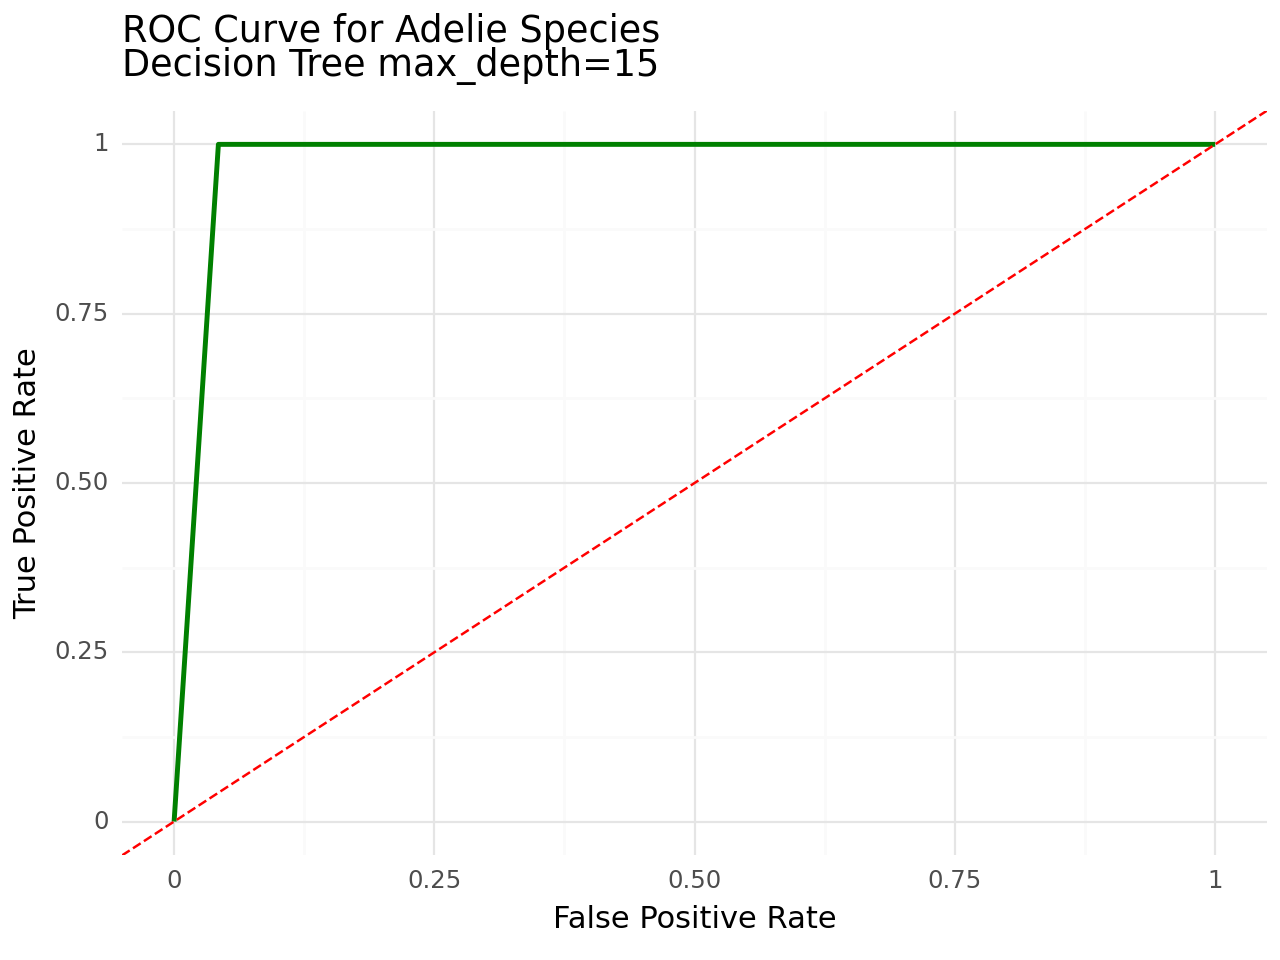

In [28]:
from plotnine import ggplot, geom_line, geom_abline, aes, labs, theme_minimal, ggtitle

roc_plot = (
    ggplot(roc_data, aes(x='FPR', y='TPR')) +
    geom_line(color='green', size=1) +
    geom_abline(linetype="dashed", color="red") +
    labs(x='False Positive Rate', y='True Positive Rate') +
    theme_minimal() +
    ggtitle("ROC Curve for Adelie Species\nDecision Tree max_depth=15")
)

print(roc_plot)